In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import io
%matplotlib inline
import sklearn

df = pd.read_csv("week2.csv",header=None)
print(df)
df.head(1)

df.columns = ['X1','X2','Y']
col = ['X1','X2']
 


        0     1  2
0   -0.34 -0.38  1
1    0.77  0.21 -1
2   -0.59  0.65 -1
3   -0.57  0.55 -1
4    0.96  0.95 -1
..    ...   ... ..
994  0.79 -0.10 -1
995 -0.30 -0.58  1
996  0.25  0.84 -1
997  0.09  0.45 -1
998 -0.87  0.42 -1

[999 rows x 3 columns]


In [ ]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix 


X = df[col]
y= df.Y

# Step 2: Get data
data_fr= df.copy()
columns = ['X1','X2']
x_training = data_fr[columns]
y_training = data_fr.Y

# Step 3: Create a model and train it

clf = LinearSVC(C=1, loss="hinge", random_state=42).fit(x_training, y_training)

y_pred = clf.predict(x_training)
score_ = clf.score(x_training, y_pred)
#report = classification_report(y_training, y_pred)

print(y_pred)
print(score_)
print(clf.coef_)
cnf_matrix = metrics.confusion_matrix(y_training, y_pred)
print('cnf_matrix:',cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_training, y_pred))
#linsvc = LinearSVC(C=1)
#linsvc.fit(X,y)


[ 1 -1 -1 -1 -1  1  1 -1 -1  1 -1 -1 -1  1  1 -1  1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1  1 -1  1 -1 -1 -1  1 -1  1
 -1  1 -1  1 -1  1 -1  1 -1 -1 -1 -1 -1 -1 -1  1  1  1 -1 -1 -1 -1 -1 -1
 -1  1  1 -1 -1 -1 -1 -1 -1  1 -1  1  1 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1
 -1  1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1  1  1 -1 -1
 -1  1 -1  1 -1 -1  1  1 -1  1 -1  1 -1 -1 -1  1 -1  1  1  1  1 -1 -1 -1
  1 -1 -1  1 -1 -1 -1 -1  1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1
 -1 -1  1 -1  1 -1 -1  1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1  1  1 -1
  1 -1  1  1 -1 -1  1  1 -1 -1  1  1 -1  1  1 -1  1 -1 -1 -1  1 -1 -1 -1
  1  1 -1 -1 -1 -1  1 -1  1 -1  1  1  1 -1  1 -1  1 -1  1  1  1  1 -1 -1
 -1 -1 -1 -1  1 -1 -1 -1  1 -1 -1  1  1 -1 -1 -1  1 -1 -1 -1 -1  1 -1 -1
  1 -1  1 -1 -1 -1  1 -1 -1  1  1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1  1
 -1  1  1 -1 -1 -1  1  1 -1 -1 -1  1  1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1
 -1  1 -1 -1 -1  1  1 -1 -1  1 -1 -1 -1 -1  1 -1 -1

       X1    X2  Y  y_pred
0   -0.34 -0.38  1       1
1    0.77  0.21 -1      -1
2   -0.59  0.65 -1      -1
3   -0.57  0.55 -1      -1
4    0.96  0.95 -1      -1
..    ...   ... ..     ...
994  0.79 -0.10 -1      -1
995 -0.30 -0.58  1       1
996  0.25  0.84 -1      -1
997  0.09  0.45 -1      -1
998 -0.87  0.42 -1      -1

[999 rows x 4 columns]


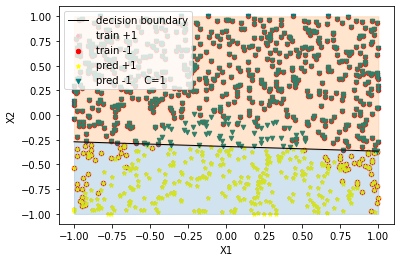

In [ ]:
df_ypred = pd.DataFrame(y_pred)
df_ypred.columns = ['y_pred']

data_fr = data_fr.join(df_ypred)

print(data_fr)

df1=df[df['Y']==1]
df2=df[df['Y']==-1]

df3=data_fr[data_fr['y_pred']==1]
df4=data_fr[data_fr['y_pred']==-1]

data_fr['X'] = data_fr.apply(lambda x: list([x['X1'],x['X2']]),axis=1)
ax = plt.gca()
df1.plot(kind='scatter', x='X1', y = 'X2', color='pink',marker='+',ax=ax, label='train +1')
df2.plot(kind='scatter', x='X1', y = 'X2', color='red',marker='o',ax=ax, label='train -1')
df3.plot(kind='scatter', x='X1', y = 'X2', color='yellow',marker='*',ax=ax, label='pred +1')
df4.plot(kind='scatter', x='X1', y = 'X2', color='teal',marker='v',ax=ax, label='pred -1    C=1')
ax.legend(loc='upper left');
#Retrieve the model parameters.
b = clf.intercept_[0]
w1,w2 = clf.coef_.T
# Calculate the intercept and gradient of the decision boundary.
c= -b/w2
m= -w1/w2

#Plot the data and the classification with the decision boundary.
xmin, xmax= -1, 1
ymin, ymax = -1, 1
xd = np.array([xmin, xmax])
yd =  m*xd + c
plt.plot(xd, yd, 'k', lw=1, ls='-', label='decision boundary')
plt.fill_between( xd, yd, ymin, color='tab:blue', alpha=0.2)
plt.fill_between( xd, yd, ymax, color='tab:orange', alpha=0.2)
ax.legend(loc='upper left');
plt.show()

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1  1
 -1  1 -1 -1 -1  1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1  1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1

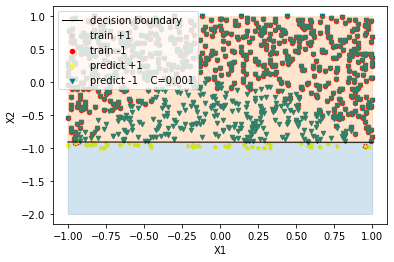

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

X = df[col]
y= df.Y

# Step 2: Get data
data_fr= df.copy()
columns = ['X1','X2']
x_training = data_fr[columns]
y_training = data_fr.Y

# Step 3: Create a model and train it
#X, y = make_classification(n_features=4, random_state=0)
#clf = make_pipeline(StandardScaler(),
                    #LinearSVC(C=0.001))
#clf.fit(x_training, y_training)

clf = LinearSVC(C=0.001, loss="hinge", random_state=42).fit(x_training, y_training)

y_pred = clf.predict(x_training)
score_ = clf.score(x_training, y_pred)
print(y_pred)
print(score_)
print(clf.coef_)
cnf_matrix = metrics.confusion_matrix(y_training, y_pred)
print('cnf_matrix:',cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_training, y_pred))


#classifier = sgd_randomized_pipe.best_estimator_.named_steps['clf']
#coef = clf.coef_(y_pred)
#report = classification_report(y_training, y_pred)

#print(y_pred)
#print(coef)

df_ypred = pd.DataFrame(y_pred)
df_ypred.columns = ['y_pred']

data_fr = data_fr.join(df_ypred)

#print(data_fr)

df1=df[df['Y']==1]
df2=df[df['Y']==-1]

df3=data_fr[data_fr['y_pred']==1]
df4=data_fr[data_fr['y_pred']==-1]

data_fr['X'] = data_fr.apply(lambda x: list([x['X1'],x['X2']]),axis=1)
ax = plt.gca()
df1.plot(kind='scatter', x='X1', y = 'X2', color='pink',marker='+',ax=ax, label='train +1')
df2.plot(kind='scatter', x='X1', y = 'X2', color='red',marker='o',ax=ax, label='train -1')
df3.plot(kind='scatter', x='X1', y = 'X2', color='yellow',marker='*',ax=ax, label='predict +1')
df4.plot(kind='scatter', x='X1', y = 'X2', color='teal',marker='v',ax=ax, label='predict -1    C=0.001')
ax.legend(loc='upper left');
#Retrieve the model parameters.
b = clf.intercept_[0]
w1,w2 = clf.coef_.T
# Calculate the intercept and gradient of the decision boundary.
c= -b/w2
m= -w1/w2

#Plot the data and the classification with the decision boundary.
xmin, xmax= -1, 1
ymin, ymax = -2, 1
xd = np.array([xmin, xmax])
yd =  m*xd + c
plt.plot(xd, yd, 'k', lw=1, ls='-', label='decision boundary')
plt.fill_between( xd, yd, ymin, color='tab:blue', alpha=0.2)
plt.fill_between( xd, yd, ymax, color='tab:orange', alpha=0.2)
ax.legend(loc='upper left');
plt.show()


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[ 1 -1 -1 -1 -1  1  1 -1 -1  1 -1 -1 -1  1  1 -1  1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1  1 -1  1 -1 -1 -1  1 -1  1
 -1  1 -1  1 -1  1 -1  1 -1 -1 -1 -1 -1 -1 -1  1  1  1 -1 -1 -1 -1 -1 -1
 -1  1  1 -1 -1 -1 -1 -1 -1  1 -1  1  1 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1
 -1  1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1  1  1 -1 -1
 -1  1 -1  1 -1 -1  1  1 -1  1 -1  1 -1 -1 -1  1 -1  1  1  1  1 -1 -1 -1
  1 -1 -1  1 -1 -1 -1 -1  1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1
 -1 -1  1 -1  1 -1 -1  1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1  1  1 -1
  1 -1  1  1 -1 -1  1  1 -1 -1  1  1 -1  1  1 -1  1 -1 -1 -1  1 -1 -1 -1
  1  1 -1 -1 -1 -1  1 -1  1 -1  1  1  1 -1  1 -1  1 -1  1  1  1  1 -1 -1
 -1 -1 -1 -1  1 -1 -1 -1  1 -1 -1  1  1 -1 -1 -1  1 -1 -1 -1 -1  1 -1 -1
  1 -1  1 -1 -1 -1  1 -1 -1  1  1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1  1
 -1  1  1 -1 -1 -1  1  1 -1 -1 -1  1  1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1
 -1  1 -1 -1 -1  1  1 -1 -1  1 -1 -1 -1 -1  1 -1 -1

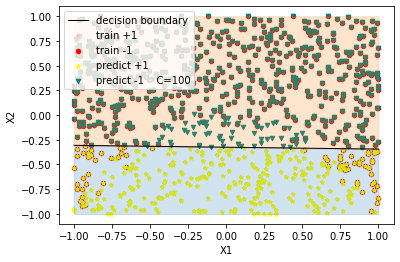

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

X = df[col]
y= df.Y

# Step 2: Get data
data_fr= df.copy()
columns = ['X1','X2']
x_training = data_fr[columns]
y_training = data_fr.Y

# Step 3: Create a model and train it
#X, y = make_classification(n_features=4, random_state=0)
clf = LinearSVC(C=100, loss="hinge", random_state=42).fit(x_training, y_training)


y_pred = clf.predict(x_training)
score_ = clf.score(x_training, y_pred)
print(y_pred)
print(score_)
print(clf.coef_)
cnf_matrix = metrics.confusion_matrix(y_training, y_pred)
print('cnf_matrix:',cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_training, y_pred))
#classifier = sgd_randomized_pipe.best_estimator_.named_steps['clf']
#coef = clf.coef_(y_pred)
#report = classification_report(y_training, y_pred)

#print(y_pred)
#print(coef)

df_ypred = pd.DataFrame(y_pred)
df_ypred.columns = ['y_pred']

data_fr = data_fr.join(df_ypred)

#print(data_fr)

df1=df[df['Y']==1]
df2=df[df['Y']==-1]

df3=data_fr[data_fr['y_pred']==1]
df4=data_fr[data_fr['y_pred']==-1]

data_fr['X'] = data_fr.apply(lambda x: list([x['X1'],x['X2']]),axis=1)
ax = plt.gca()
df1.plot(kind='scatter', x='X1', y = 'X2', color='pink',marker='+',ax=ax, label='train +1')
df2.plot(kind='scatter', x='X1', y = 'X2', color='red',marker='o',ax=ax, label='train -1')
df3.plot(kind='scatter', x='X1', y = 'X2', color='yellow',marker='*',ax=ax, label='predict +1')
df4.plot(kind='scatter', x='X1', y = 'X2', color='teal',marker='v',ax=ax, label='predict -1    C=100')
ax.legend(loc='upper left');

#Retrieve the model parameters.
b = clf.intercept_[0]
w1,w2 = clf.coef_.T
# Calculate the intercept and gradient of the decision boundary.
c= -b/w2
m= -w1/w2

#Plot the data and the classification with the decision boundary.
xmin, xmax= -1, 1
ymin, ymax = -1, 1
xd = np.array([xmin, xmax])
yd =  m*xd + c
plt.plot(xd, yd, 'k', lw=1, ls='-', label='decision boundary')
plt.fill_between( xd, yd, ymin, color='tab:blue', alpha=0.2)
plt.fill_between( xd, yd, ymax, color='tab:orange', alpha=0.2)
ax.legend(loc='upper left');
plt.show()



import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import io
%matplotlib inline
import sklearn

from google.colab import files
uploaded = files.upload()

df = pd.read_csv(io.BytesIO(uploaded['Week 2 Dataset.csv']),header=None)
print(df)
df.head(1)

df.columns = ['X1','X2','Y']
col = ['X1','X2']
 
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

X = df[col]
y= df.Y

X, y = make_classification(n_features=4, random_state=0)
clf = make_pipeline(StandardScaler(),
                    LinearSVC(C=1))
clf.fit(X, y)